In [1]:
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# From https://opendata.datainfogreffe.fr/explore/dataset/chiffres-cles-2022/information/

df = pd.read_csv("infogreffe-2022.csv", sep = ";")

In [3]:
infogreffe = df
infogreffe.shape

(624154, 41)

In [4]:
infogreffe.columns

Index(['Dénomination', 'Siren', 'Nic', 'Forme Juridique', 'Code APE',
       'Libellé APE', 'Adresse', 'Code postal', 'Ville', 'Num. dept.',
       'Département', 'Région', 'Code Greffe', 'Greffe',
       'Date immatriculation', 'Date radiation', 'Statut', 'Geolocalisation',
       'Date de publication', 'Millesime 1', 'Date de cloture exercice 1',
       'Durée 1', 'CA 1', 'Résultat 1', 'Effectif 1', 'Millesime 2',
       'Date de cloture exercice 2', 'Durée 2', 'CA 2', 'Résultat 2',
       'Effectif 2', 'Millesime 3', 'Date de cloture exercice 3', 'Durée 3',
       'CA 3', 'Résultat 3', 'Effectif 3', 'id', 'tranche_ca_millesime_1',
       'tranche_ca_millesime_2', 'tranche_ca_millesime_3'],
      dtype='object')

In [5]:
# changing the names of the columns:
def clean_my_columns_titles(df):
    df.columns = df.columns.str.replace(" ","_").str.replace(".","").str.replace("é","e").str.lower().str.strip() 
    return df 
clean_my_columns_titles(infogreffe)

,denomination,siren,nic,forme_juridique,code_ape,libelle_ape,adresse,code_postal,ville,num_dept,...,millesime_3,date_de_cloture_exercice_3,duree_3,ca_3,resultat_3,effectif_3,id,tranche_ca_millesime_1,tranche_ca_millesime_2,tranche_ca_millesime_3
0,LES 2 PITCHOUNS,845379692,13.0,Société par actions simplifiée à associé unique,7022Z,Conseil pour les affaires et autres conseils d...,28 LOTISSEMENT DES HELIANTHES,13390.0,AURIOL,13.0,...,2020.0,2020-03-31,12.0,2825.0,1413.0,NaN,NaN,A - de 32K,A - de 32K,A - de 32K
1,BEGONIN CHARPENTES ET COUVERTURES,848978797,19.0,Société par actions simplifiée à associé unique,4332A,Travaux de menuiserie bois et pvc,MALLAROCHE,42560.0,GUMIERES,42.0,...,2020.0,2020-03-31,13.0,388735.0,60177.0,2.0,NaN,D entre 250K et 1M,D entre 250K et 1M,D entre 250K et 1M
2,CloudMS,897604880,12.0,Société par actions simplifiée à associé unique,6202A,Conseil en systèmes et logiciels informatiques,9 RUE DU COMMANDANT TULASNE,37550.0,ST AVERTIN,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E + d 1M,E + d 1M,E + d 1M
3,AUX TRAVAILLEURS REUNIS,306013947,32.0,Société à responsabilité limitée,4642Z,Commerce de gros (commerce interentreprises) d...,9 RUE DE LA HOUE,21800.0,QUETIGNY,21.0,...,2020.0,2020-02-29,12.0,NaN,NaN,NaN,NaN,E + d 1M,E + d 1M,E + d 1M
4,CLAUDON,381383215,39.0,Société à responsabilité limitée,8690A,Ambulances,ZONE INDUSTRIELLE BOSSU PRE,55600.0,MONTMEDY,55.0,...,2020.0,2020-02-29,12.0,614136.0,6628.0,0.0,NaN,E + d 1M,E + d 1M,D entre 250K et 1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624149,BH AUTO,911518348,14.0,Société par actions simplifiée à associé unique,4520A,Entretien et réparation de véhicules automobil...,15 ALLEE DES FLEURS,81380.0,LESCURE D ALBIGEOIS,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E + d 1M,E + d 1M,E + d 1M
624150,PHD LIMO,911813764,22.0,Société par actions simplifiée à associé unique,4932Z,Transports de voyageurs par taxis,3 RUE DE BU,28410.0,ABONDANT,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A - de 32K,E + d 1M,E + d 1M
624151,PASSION FRUITS,912355278,17.0,Société par actions simplifiée à associé unique,4721Z,Commerce de détail de fruits et légumes en mag...,5 AVENUE SAINT JEROME,13100.0,AIX EN PROVENCE,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A - de 32K,E + d 1M,E + d 1M
624152,AUSTRAL ENERGIE,913036125,15.0,Société à responsabilité limitée,7010Z,Activités des sièges sociaux,4 RUE BENOITE BOULARD,97410.0,ST PIERRE,974.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E + d 1M,E + d 1M,E + d 1M


In [6]:
infogreffe.isna().sum()

denomination                       0
siren                              0
nic                              116
forme_juridique                    0
code_ape                       13282
libelle_ape                    13282
adresse                         3032
code_postal                       87
ville                             36
num_dept                          89
departement                     6550
region                          6550
code_greffe                        0
greffe                             0
date_immatriculation              13
date_radiation                624154
statut                             0
geolocalisation               624154
date_de_publication                0
millesime_1                        1
date_de_cloture_exercice_1         4
duree_1                            4
ca_1                          486936
resultat_1                    479033
effectif_1                    607303
millesime_2                    59313
date_de_cloture_exercice_2     59313
d

In [7]:
# To keep for sure: denomination, siren, nic (to make siret) as only 116 missing, forme_juridique,
    # code_ape & libelle_ape (only missing 13K)
    # adresse, code_postal,ville, num_dept, departement, region, even if for the last 2 6550 are missing)
    # code_greffe, greffe, date immatriculation, statut, date_de_publication
    # for years 1-2-3: millesime, date de cloture exercice, duree, ca, resultat
    # tranche_ca_millesime 1-2-3 : good to filter, to keep

# To drop: date radiation, geolocalisation, id (empty), and statut (all 'B')
    # date_de cloture_exercice 1-2-3 (not using it), effectif 1-2-3 (too much missing info, more data in the other file...)

In [8]:
infogref_gen = ['denomination', 'siren', 'nic', 'forme_juridique', 'code_ape','libelle_ape', 'adresse', 'code_postal', 'ville', 
             'num_dept', 'departement', 'region', 'code_greffe', 'greffe', 'date_immatriculation', 'date_de_publication']
infogref_numbers_only = ['millesime_1', 'duree_1', 'ca_1', 'resultat_1', 'millesime_2', 
                    'duree_2', 'ca_2', 'resultat_2', 'millesime_3', 'duree_3', 'ca_3', 'resultat_3',
                    'tranche_ca_millesime_1', 'tranche_ca_millesime_2', 'tranche_ca_millesime_3']

full_list = infogref_gen + infogref_numbers_only
infogreffe= infogreffe[full_list]


In [9]:
infogreffe.duplicated().any()

True

In [10]:
infogreffe.duplicated().value_counts()

False    624042
True        112
Name: count, dtype: int64

In [11]:
duplicate_rows = infogreffe[infogreffe.duplicated()]
duplicate_rows

,denomination,siren,nic,forme_juridique,code_ape,libelle_ape,adresse,code_postal,ville,num_dept,...,duree_2,ca_2,resultat_2,millesime_3,duree_3,ca_3,resultat_3,tranche_ca_millesime_1,tranche_ca_millesime_2,tranche_ca_millesime_3
52144,3D MATIERES,801156910,11.0,Société à responsabilité limitée à associé unique,4333Z,Travaux de revêtement des sols et des murs,10 RUE DU CONGO,44800.0,ST HERBLAIN,44.0,...,12.0,NaN,NaN,2020.0,12.0,NaN,NaN,E + d 1M,E + d 1M,E + d 1M
52811,ACME CONSULTANTS,334077435,33.0,Société par actions simplifiée à associé unique,7320Z,études de marché et sondages,4 PLACE LOUIS ARMAND,75012.0,PARIS,75.0,...,12.0,NaN,NaN,2020.0,12.0,NaN,NaN,E + d 1M,E + d 1M,E + d 1M
83023,ANGELIQUE RESSENCOURT,410793889,16.0,Société à responsabilité limitée,5610A,Restauration traditionnelle,3 RUE HAUTE,14600.0,HONFLEUR,14.0,...,NaN,NaN,NaN,2020.0,12.0,NaN,NaN,E + d 1M,E + d 1M,E + d 1M
93072,SACBCT,534009121,52.0,Société à responsabilité limitée,7311Z,Activités des agences de publicité,31 ROUTE NATIONALE 152,45130.0,ST AY,45.0,...,12.0,NaN,NaN,2020.0,12.0,NaN,NaN,E + d 1M,E + d 1M,E + d 1M
108814,SARL JEROME BIGNON,505060467,14.0,Société à responsabilité limitée,1013B,Charcuterie,6 RUE DU COMMERCE,37260.0,ARTANNES SUR INDRE,37.0,...,12.0,NaN,NaN,2020.0,12.0,NaN,NaN,E + d 1M,E + d 1M,E + d 1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613126,CHOUX-CHOUX,848688891,11.0,Société par actions simplifiée à associé unique,1071C,Boulangerie et boulangerie-pâtisserie,15 AVENUE ANDRE MARIE AMPERE,77420.0,CHAMPS SUR MARNE,77.0,...,12.0,NaN,NaN,2020.0,12.0,NaN,NaN,E + d 1M,E + d 1M,E + d 1M
618112,LE DAUPHIN,533452884,18.0,Société par actions simplifiée à associé unique,5610A,Restauration traditionnelle,Centre Commercial Carrefour,76130.0,MONT SAINT AIGNAN,76.0,...,12.0,NaN,NaN,2020.0,12.0,NaN,NaN,E + d 1M,E + d 1M,E + d 1M
618676,PARIS HOTELS,799040563,14.0,Société par actions simplifiée à associé unique,4645Z,Comm. de gros (comm. interentreprises) de parf...,10 PASSAGE DE L INDUSTRIE,75010.0,PARIS,75.0,...,12.0,NaN,NaN,2020.0,12.0,NaN,NaN,E + d 1M,E + d 1M,E + d 1M
619128,JOUR JJ PRODUCTION,819667155,25.0,Société à responsabilité limitée,9004Z,Gestion de salles de spectacles,2 RUE DES BORDES,77515.0,ST AUGUSTIN,77.0,...,12.0,NaN,NaN,2020.0,12.0,NaN,NaN,E + d 1M,E + d 1M,E + d 1M


In [12]:
max(duplicate_rows.ca_1)


nan

In [13]:
infogreffe['siren'].nunique()

622555

In [14]:
infogreffe.drop_duplicates(inplace=True)

C:\Users\Javier\AppData\Local\Temp\ipykernel_6924\2124454137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infogreffe.drop_duplicates(inplace=True)


In [15]:
infogreffe.duplicated().any()

False

In [16]:
infogreffe.shape

(624042, 31)

In [17]:
def cat_stats(df, column):
    """Function to generate the statistical data for categorical columns"""
    print(f'****** Brief analysis of {column} *****')
    frequency_table = df[column].value_counts()
    # Calculating the proportion of each unique value 
    proportion_table = df[column].value_counts(normalize=True)
    display(frequency_table, proportion_table)
      
    mode_col = df[column].mode()
    display(f'mode = {mode_col}')
          
    # Plotting a count plot for the 'MSZoning' column from the dataframe 'df', using the "Set3" palette for coloring
    sns.countplot(data=df, x= column, palette="Set1")
    plt.show()

In [18]:
# to keep as long as not working via the function_file.py (Javier) -ot gives an intermittent error sometimes
# it works other times no, so was kept to run the code
def num_stats(df, column):
    """Function to generate the statistical data for numerical columns à la describe with mode in addition"""
    print(f'****** Brief Analysis of {column} *****')
          
    mean_col = df[column].mean().round()
    median_col = df[column].median()
    mode_col = df[column].mode()[0]
    variance_col = round(df[column].var(),2)
    std_dev_col = round(df[column].std(),2)
    min_col = df[column].min()
    max_col = df[column].max()
    range_col = max_col - min_col
    quantiles_col = df[column].quantile([0.25, 0.5, 0.75])

    print(f'mean= {mean_col}, median= {median_col}, mode= {mode_col}')
    print(f'var = {variance_col}, std_dev = {std_dev_col}, min = {min_col}, max = {max_col}, range = {range_col}')
    print(f'quantiles : \n{quantiles_col}')
    
    # Plotting a histogram for the column of the 'data' dataframe
    # 'bins=30' divides the data into 30 bins for more detailed granularity
    sns.histplot(df[column], kde=True, bins=30, color="blue")
    plt.show()  # to show the plot as it goes!
    sns.boxplot(data = df[column], color="lightgreen")
    plt.show()  # to show the plot as it goes!

****** Brief analysis of region *****


region
Ile-de-France                          114873
Auvergne-Rhône-Alpes                   100003
Languedoc-Roussillon-Midi-Pyrénées      66774
Provence-Alpes-Côte d'Azur              61478
Aquitaine-Limousin-Poitou-Charentes     58281
Pays-de-la-Loire                        39066
Alsace-Champagne-Ardenne-Lorraine       37000
Nord-Pas-de-Calais-Picardie             36534
Bretagne                                25725
Normandie                               22357
Bourgogne-Franche-Comté                 22236
Centre-Val de Loire                     18666
La Réunion                               5170
Corse                                    4378
Guadeloupe                               2171
Martinique                               1402
Guyane                                   1159
Mayotte                                   220
Name: count, dtype: int64

region
Ile-de-France                          0.186031
Auvergne-Rhône-Alpes                   0.161950
Languedoc-Roussillon-Midi-Pyrénées     0.108137
Provence-Alpes-Côte d'Azur             0.099561
Aquitaine-Limousin-Poitou-Charentes    0.094383
Pays-de-la-Loire                       0.063265
Alsace-Champagne-Ardenne-Lorraine      0.059920
Nord-Pas-de-Calais-Picardie            0.059165
Bretagne                               0.041660
Normandie                              0.036206
Bourgogne-Franche-Comté                0.036010
Centre-Val de Loire                    0.030229
La Réunion                             0.008373
Corse                                  0.007090
Guadeloupe                             0.003516
Martinique                             0.002270
Guyane                                 0.001877
Mayotte                                0.000356
Name: proportion, dtype: float64

'mode = 0    Ile-de-France\nName: region, dtype: object'

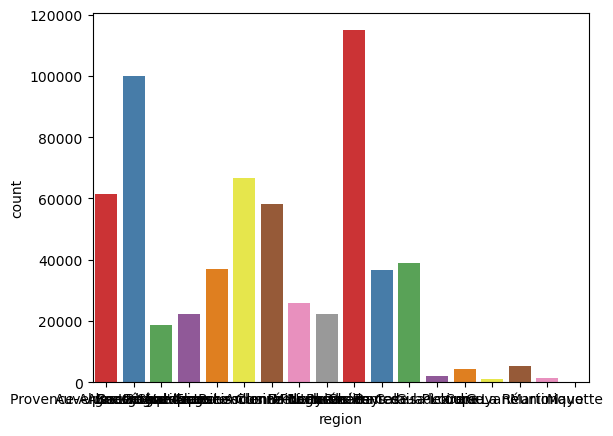

****** Brief analysis of tranche_ca_millesime_1 *****


tranche_ca_millesime_1
E + d 1M               536448
D entre 250K et 1M      29673
C entre 82K et 250K     27421
A - de 32K              15474
B entre 32K et 82K      15026
Name: count, dtype: int64

tranche_ca_millesime_1
E + d 1M               0.859634
D entre 250K et 1M     0.047550
C entre 82K et 250K    0.043941
A - de 32K             0.024796
B entre 32K et 82K     0.024079
Name: proportion, dtype: float64

'mode = 0    E + d 1M\nName: tranche_ca_millesime_1, dtype: object'

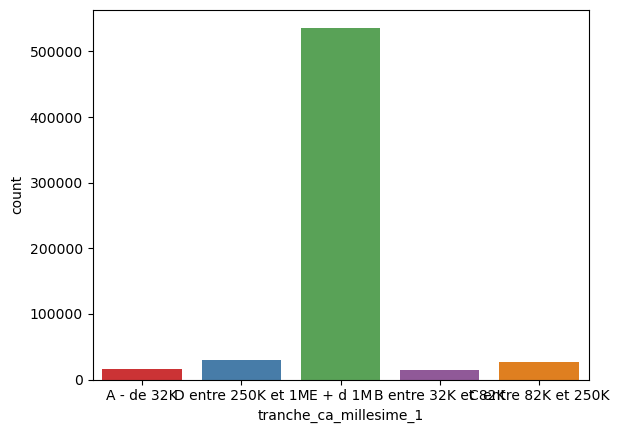

****** Brief analysis of tranche_ca_millesime_2 *****


tranche_ca_millesime_2
E + d 1M               534249
D entre 250K et 1M      28645
C entre 82K et 250K     25939
A - de 32K              20611
B entre 32K et 82K      14598
Name: count, dtype: int64

tranche_ca_millesime_2
E + d 1M               0.856111
D entre 250K et 1M     0.045902
C entre 82K et 250K    0.041566
A - de 32K             0.033028
B entre 32K et 82K     0.023393
Name: proportion, dtype: float64

'mode = 0    E + d 1M\nName: tranche_ca_millesime_2, dtype: object'

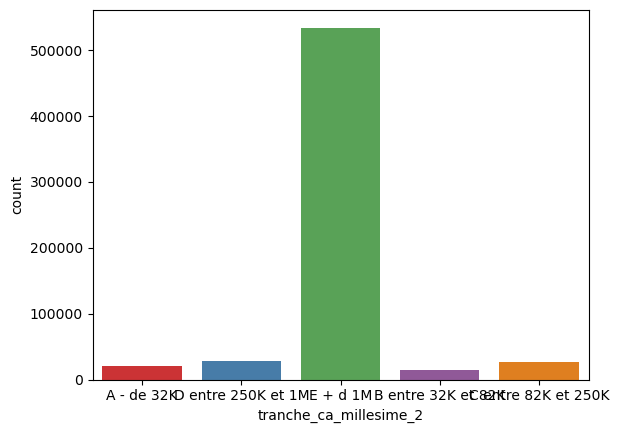

****** Brief analysis of tranche_ca_millesime_3 *****


tranche_ca_millesime_3
E + d 1M               530809
D entre 250K et 1M      30553
C entre 82K et 250K     27213
A - de 32K              20469
B entre 32K et 82K      14998
Name: count, dtype: int64

tranche_ca_millesime_3
E + d 1M               0.850598
D entre 250K et 1M     0.048960
C entre 82K et 250K    0.043608
A - de 32K             0.032801
B entre 32K et 82K     0.024034
Name: proportion, dtype: float64

'mode = 0    E + d 1M\nName: tranche_ca_millesime_3, dtype: object'

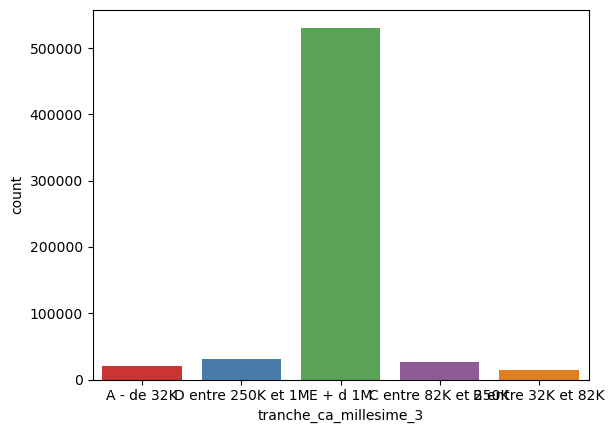

In [19]:
for col in ["region",'tranche_ca_millesime_1', 'tranche_ca_millesime_2', 'tranche_ca_millesime_3']:
    cat_stats(infogreffe, col) 

****** Brief Analysis of ca_1 *****
mean= 7675483.0, median= 400628.5, mode= 0.0
var = 3.820382135883424e+17, std_dev = 618092398.91, min = -19132705.0, max = 225928206000.0, range = 225947338705.0
quantiles : 
0.25      97440.75
0.50     400628.50
0.75    1970318.25
Name: ca_1, dtype: float64


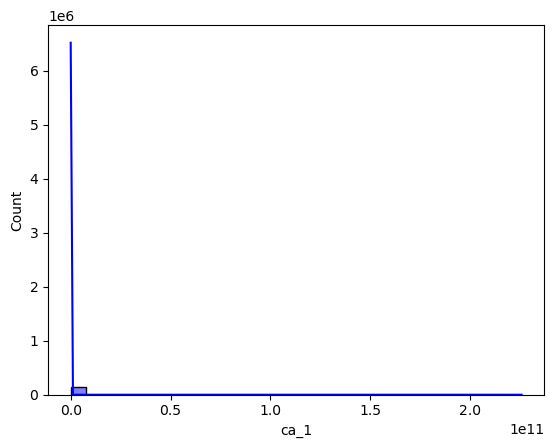

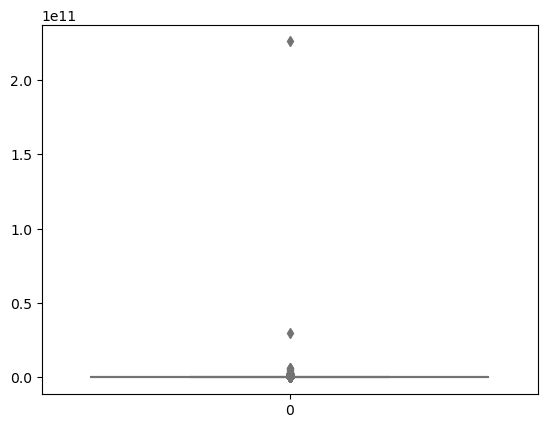

****** Brief Analysis of resultat_1 *****
mean= 542717.0, median= 20957.0, mode= 0.0
var = 7428525963774721.0, std_dev = 86188896.99, min = -790850871.0, max = 32595832000.0, range = 33386682871.0
quantiles : 
0.25       -57.5
0.50     20957.0
0.75    117680.0
Name: resultat_1, dtype: float64


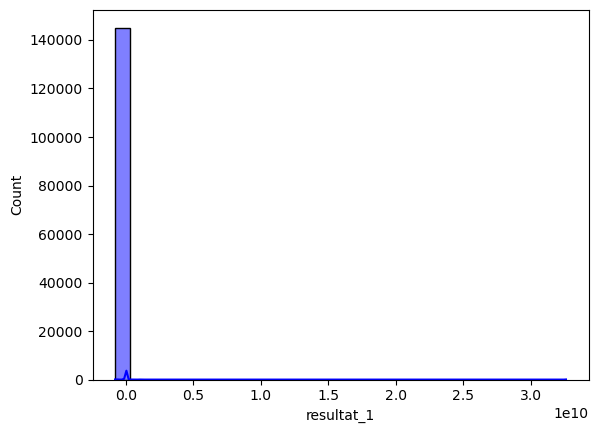

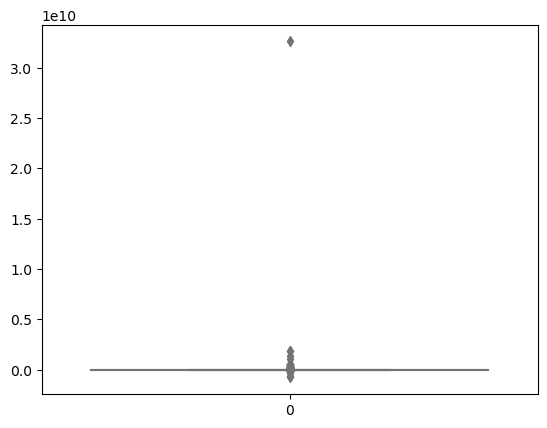

****** Brief Analysis of ca_2 *****
mean= 6299151.0, median= 337420.0, mode= 0.0
var = 4.020177570541196e+16, std_dev = 200503804.72, min = -1975583.0, max = 53775811000.0, range = 53777786583.0
quantiles : 
0.25      76376.75
0.50     337420.00
0.75    1675637.00
Name: ca_2, dtype: float64


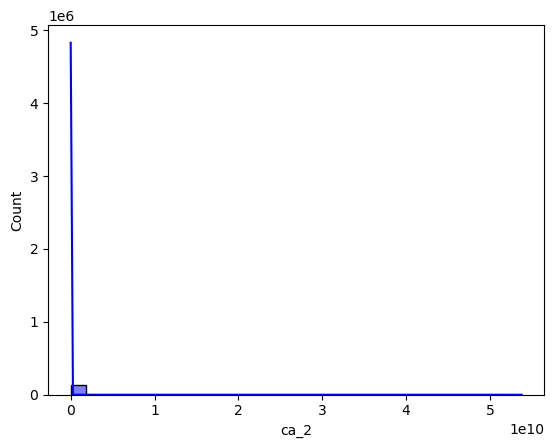

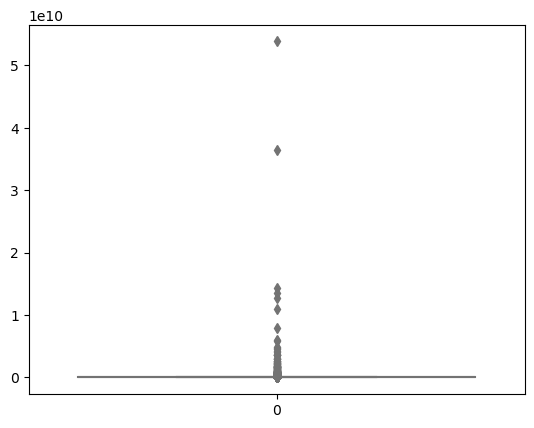

****** Brief Analysis of resultat_2 *****
mean= 501920.0, median= 23350.0, mode= 0.0
var = 4862382237651912.0, std_dev = 69730784.0, min = -4934270000.0, max = 23863082000.0, range = 28797352000.0
quantiles : 
0.25       456.0
0.50     23350.0
0.75    107147.0
Name: resultat_2, dtype: float64


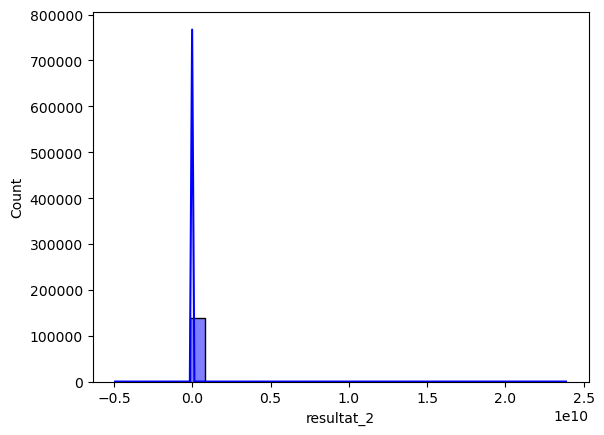

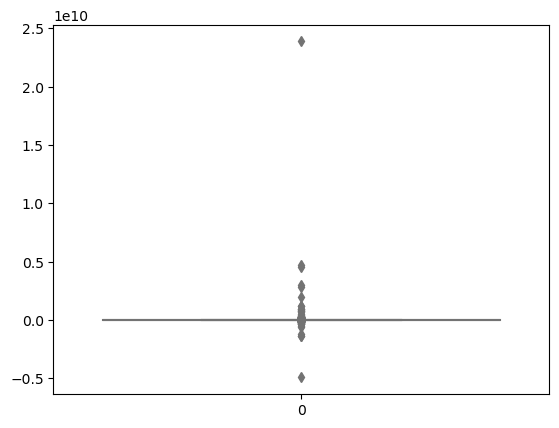

****** Brief Analysis of ca_3 *****
mean= 14846212.0, median= 319467.0, mode= 0.0
var = 1.3698826252486838e+19, std_dev = 3701192544.64, min = -932030.0, max = 1367664718000.0, range = 1367665650030.0
quantiles : 
0.25      77276.25
0.50     319467.00
0.75    1507873.75
Name: ca_3, dtype: float64


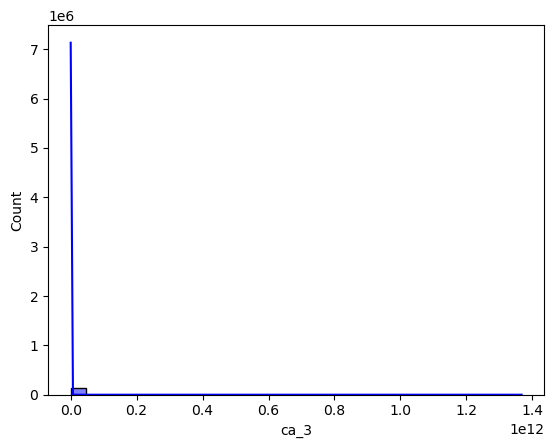

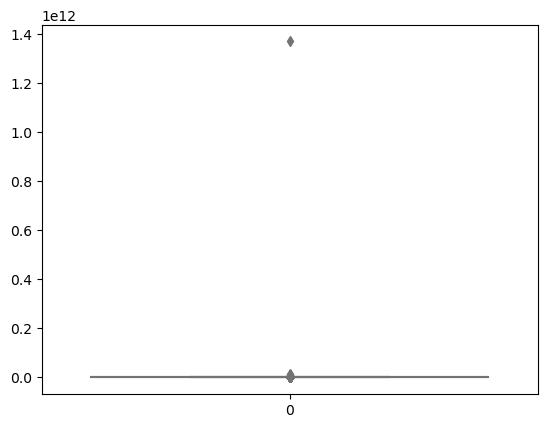

****** Brief Analysis of resultat_3 *****
mean= 3037799.0, median= 15114.0, mode= 0.0
var = 1.068826237487592e+18, std_dev = 1033840528.07, min = -1316000000.0, max = 385780208000.0, range = 387096208000.0
quantiles : 
0.25     -852.00
0.50    15114.00
0.75    75516.25
Name: resultat_3, dtype: float64


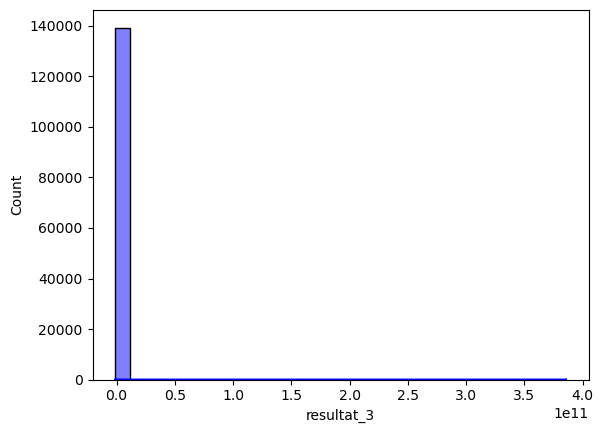

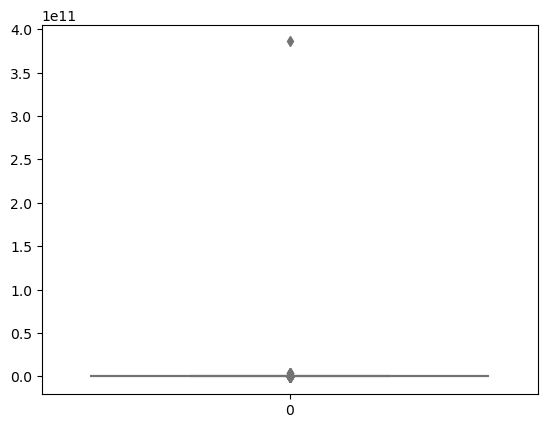

In [20]:
for col in ['ca_1', 'resultat_1', 'ca_2', 'resultat_2', 'ca_3', 'resultat_3']:
    num_stats(infogreffe, col)

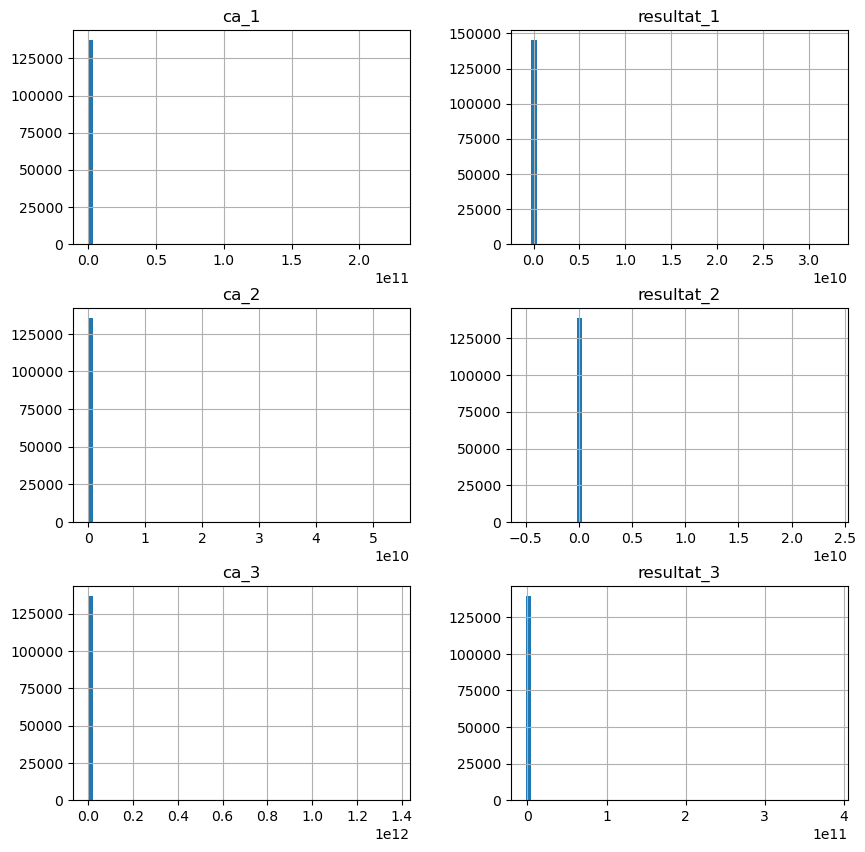

In [21]:
# Creating histograms for each numerical column in 'df1 numerical'
infogreffe[['ca_1', 'resultat_1', 'ca_2', 'resultat_2', 'ca_3', 'resultat_3']].hist(figsize=(10, 10), bins=60, xlabelsize=10, ylabelsize=10); # makes it automatically to fit the figure!

In [19]:
infogreffe.ca_1.isna().sum()

486834

In [20]:
# revenue : min at 2800K€ (2.8 million) max at 55,500,000K€ (55.5 billion)
    # median at 9.8 million, mean at 6.5 million, 50% of the companies are between 5.5M€ and 23M€
    # we are in thousands K# to million K€

test= pd.qcut(infogreffe[infogreffe['ca_1'] > 0]['ca_1'], q=10)
test.value_counts()

ca_1
(0.999, 30397.0]               13588
(30397.0, 74249.0]             13588
(74249.0, 134272.0]            13588
(414350.5, 822191.0]           13588
(1468463.5, 2868763.0]         13588
(7714638.5, 225928206000.0]    13588
(134272.0, 228046.0]           13587
(228046.0, 414350.5]           13587
(822191.0, 1468463.5]          13587
(2868763.0, 7714638.5]         13587
Name: count, dtype: int64

****** Brief Analysis of ca_1 *****
mean= 1009669.0, median= 303435.5, mode= 120000.0
var = 2286068721084.31, std_dev = 1511975.11, min = 1.0, max = 7713997.0, range = 7713996.0
quantiles : 
0.25      87567.75
0.50     303435.50
0.75    1263285.00
Name: ca_1, dtype: float64


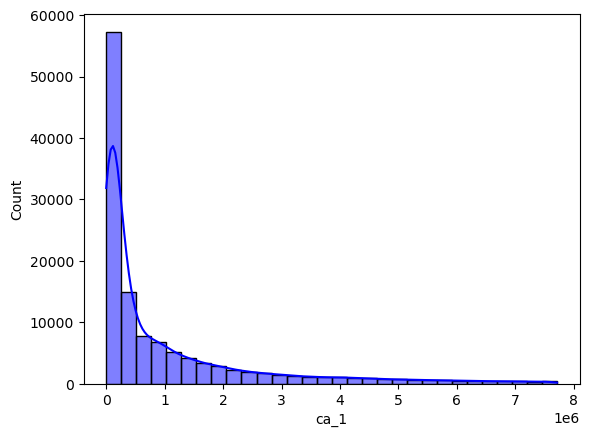

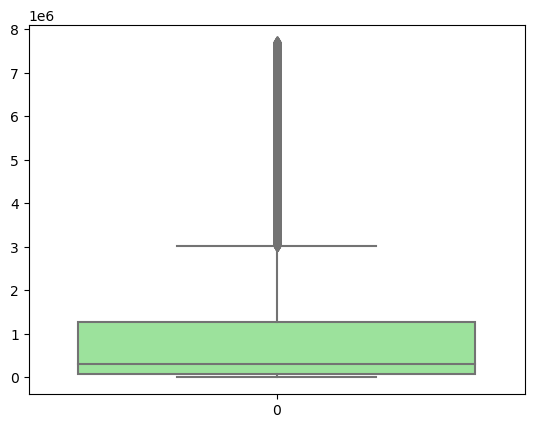

In [24]:
num_stats(infogreffe[(infogreffe['ca_1'] > 0)&(infogreffe['ca_1'] < 7714638.5 )], 'ca_1')

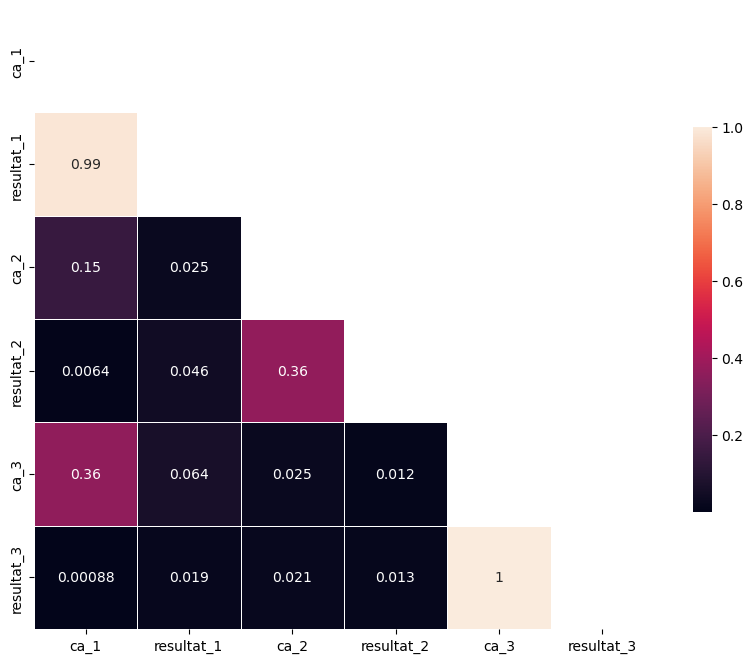

In [21]:
# Correlation heatmapt for the light dataframe, removing siren, name, naf and workforce
df_new = infogreffe[['ca_1', 'resultat_1', 'ca_2', 'resultat_2', 'ca_3', 'resultat_3']]

corr=np.abs(df_new.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [ ]:
# Making a plot lines of revenue per group for the last three years
# create for all codes for France average
# create France average for 6202A and for 7022Z
# create the Paris average for 6202A and for 7022Z

# Same for result

In [25]:
mask_6202A = infogreffe['code_ape'] == '6202A'
mask_7022Z = infogreffe['code_ape'] == '7022Z'

france_revenue = [infogreffe['ca_3'].median(), infogreffe['ca_2'].median(), infogreffe['ca_1'].median()]
france_income = [infogreffe['ca_3'].median(), infogreffe['ca_2'].median(), infogreffe['ca_1'].median()]

c_6202A_revenue = [infogreffe[mask_6202A]['ca_3'].median(), infogreffe[mask_6202A]['ca_2'].median(), 
                   infogreffe[mask_6202A]['ca_1'].median()]
c_7022Z_revenue = [infogreffe[mask_7022Z]['ca_3'].median(), infogreffe[mask_7022Z]['ca_2'].median(), 
                   infogreffe[mask_7022Z]['ca_1'].median()]
c_7022Z_revenue,c_6202A_revenue, france_revenue




([97150.0, 102856.0, 121110.0],
 [224800.0, 268124.5, 279417.0],
 [319467.0, 337420.0, 400628.5])

In [43]:
#Creating a function to generate a data frame with the median per year of France and the codes
def median_per_year(code_ape):
    mask = infogreffe['code_ape'] == code_ape
    
    france_revenue = [infogreffe['ca_3'].median(), infogreffe['ca_2'].median(), infogreffe['ca_1'].median()]
    france_income = [infogreffe['resultat_3'].median(), infogreffe['resultat_2'].median(), infogreffe['resultat_1'].median()]

    revenue_list = [infogreffe[mask]['ca_3'].median(), infogreffe[mask]['ca_2'].median(), 
                   infogreffe[mask]['ca_1'].median()]
    
    income_list = [infogreffe[mask]['resultat_3'].median(), infogreffe[mask]['resultat_2'].median(), 
                   infogreffe[mask]['resultat_1'].median()]
    
    data = {'year': [2020, 2021, 2022, 2020, 2021, 2022 ], 
            'group': ['France']*3+[code_ape]*3,
            'revenue': france_revenue + revenue_list,
            'income' : france_income + income_list}
    return pd.DataFrame(data)

#Creating a function to generate a data frame with the median per year of Paris and the codes in Paris
def median_paris_per_year(code_ape):
    mask = (infogreffe['code_ape'] == code_ape) & (infogreffe['num_dept'] == 75)
    mask_p = infogreffe['num_dept'] == 75
    
    paris_revenue = [infogreffe[mask_p]['ca_3'].median(), infogreffe[mask_p]['ca_2'].median(), 
                     infogreffe[mask_p]['ca_1'].median()]
    paris_income = [infogreffe[mask_p]['resultat_3'].median(), infogreffe[mask_p]['resultat_2'].median(), 
                    infogreffe[mask_p]['resultat_1'].median()]

    revenue_list = [infogreffe[mask]['ca_3'].median(), infogreffe[mask]['ca_2'].median(), 
                   infogreffe[mask]['ca_1'].median()]
    
    income_list = [infogreffe[mask]['resultat_3'].median(), infogreffe[mask]['resultat_2'].median(), 
                   infogreffe[mask]['resultat_1'].median()]
    
    data = {'year': [2020, 2021, 2022, 2020, 2021, 2022 ], 
            'group': ['Paris']*3+[code_ape]*3,
            'revenue': paris_revenue + revenue_list,
            'income' : paris_income + income_list}
    return pd.DataFrame(data)


In [49]:
median_per_year('6202A')

,year,group,revenue,income
0,2020,France,319467.0,15114.0
1,2021,France,337420.0,23350.0
2,2022,France,400628.5,20957.0
3,2020,6202A,224800.0,21077.0
4,2021,6202A,268124.5,28442.0
5,2022,6202A,279417.0,32140.0


In [44]:
# Plot fonction for revenue
def history_rev(df):
    plt.figure(figsize=(10, 6))
    for grou in df['group'].unique():
        df_grou = df[df['group'] == grou]
        plt.plot(df_grou['year'], df_grou['revenue'], marker='o', label=grou)

    plt.title('median revenue per years')
    plt.xlabel('year')
    plt.ylabel('median revenue')
    plt.xticks(df['year'].unique())
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot fonction for income
def history_inc(df):
    plt.figure(figsize=(10, 6))
    for grou in df['group'].unique():
        df_grou = df[df['group'] == grou]
        plt.plot(df_grou['year'], df_grou['income'], marker='o', label=grou)

    plt.title('median income per years')
    plt.xlabel('year')
    plt.ylabel('median income')
    plt.xticks(df['year'].unique())
    plt.legend()
    plt.grid(True)
    plt.show()
    

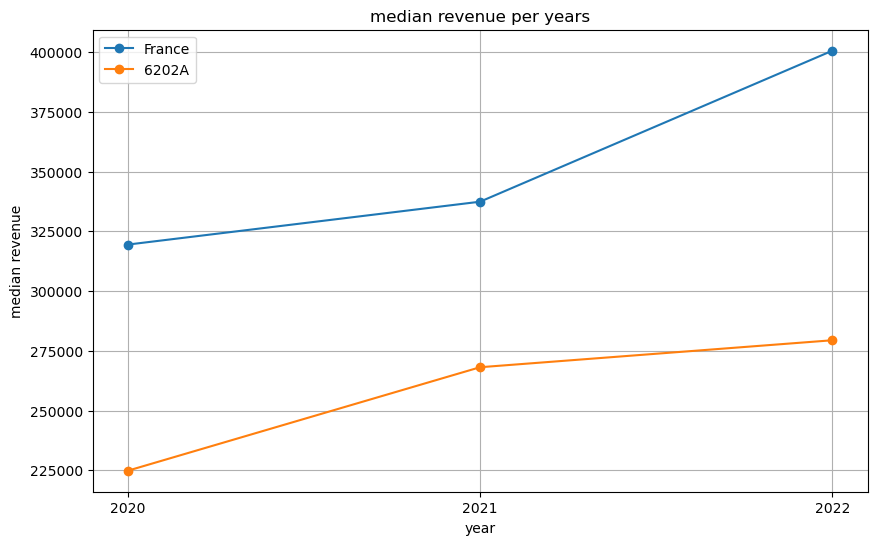

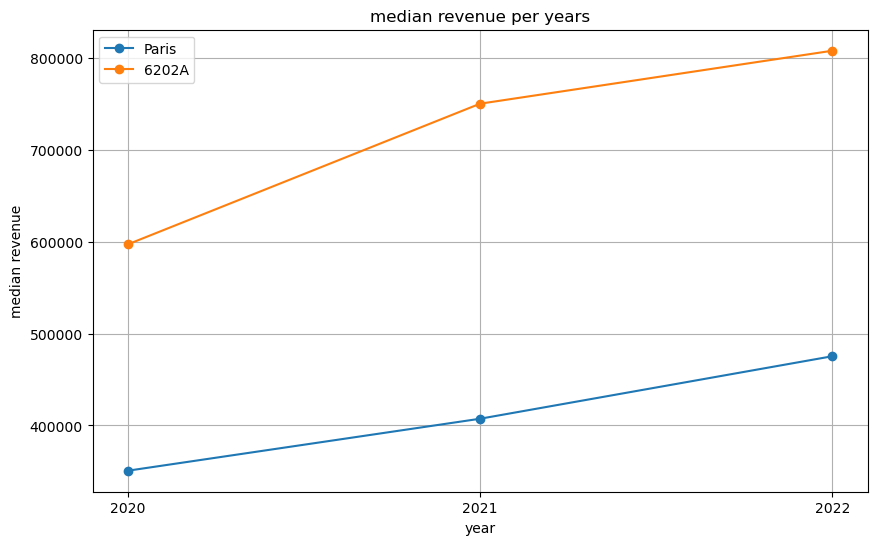

(None, None)

In [45]:
history_rev(median_per_year('6202A')), history_rev(median_paris_per_year('6202A'))

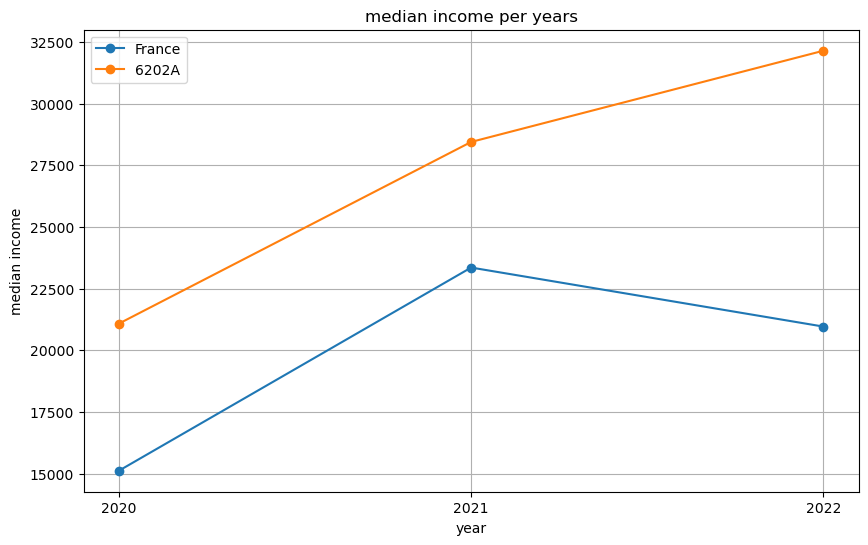

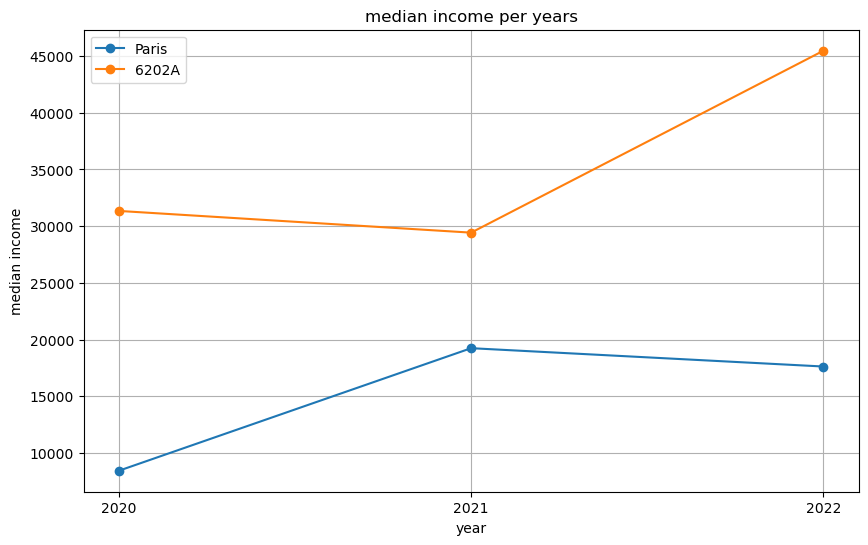

(None, None)

In [46]:
history_inc(median_per_year('6202A')), history_inc(median_paris_per_year('6202A'))

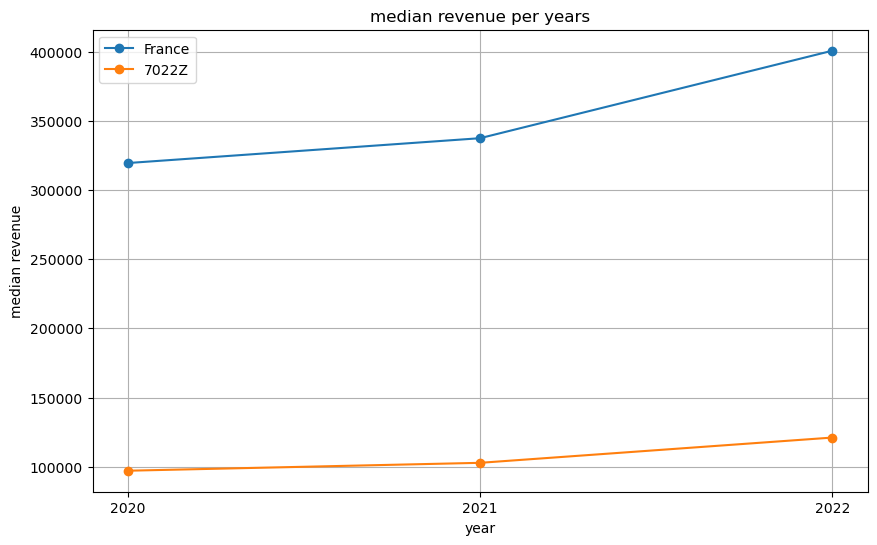

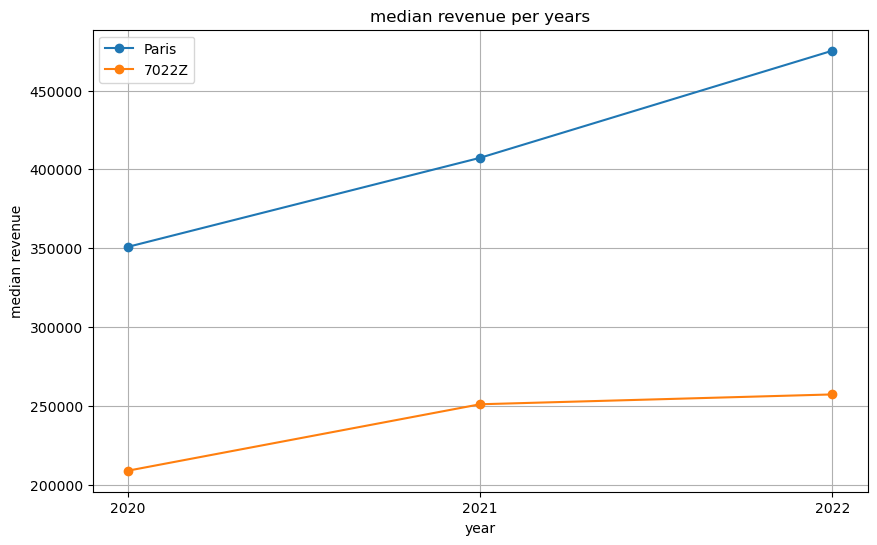

(None, None)

In [47]:
history_rev(median_per_year('7022Z')), history_rev(median_paris_per_year('7022Z'))

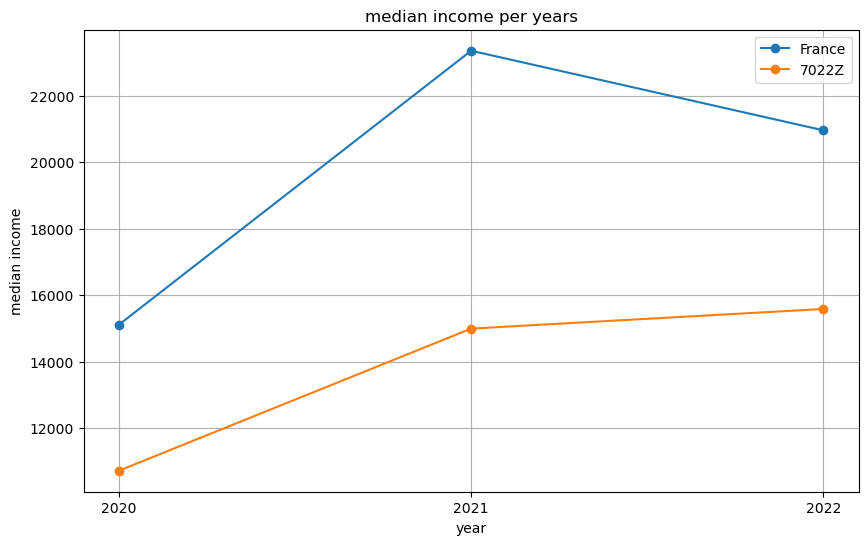

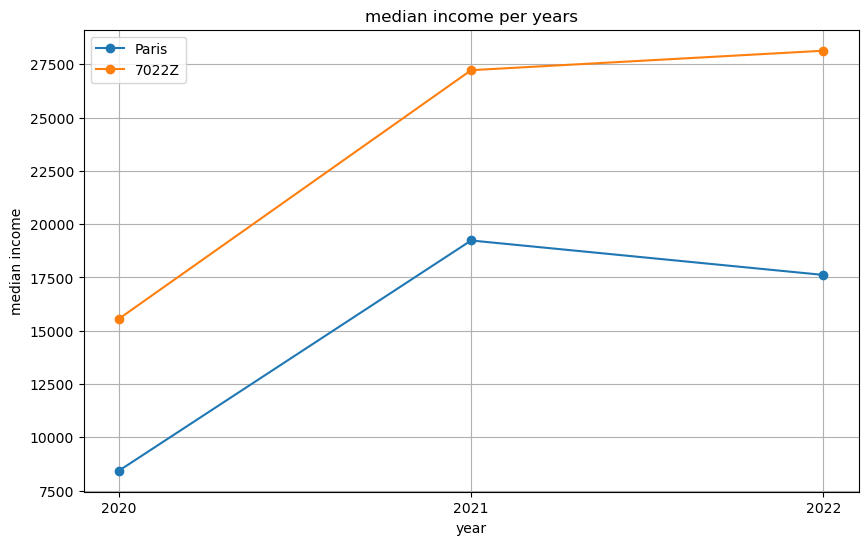

(None, None)

In [48]:
history_inc(median_per_year('7022Z')), history_inc(median_paris_per_year('7022Z'))

In [26]:
# splitting in two dataframes, removing some columns
# 
infogref_gen = ['denomination', 'siren', 'nic', 'forme_juridique', 'code_ape','libelle_ape', 'adresse', 'code_postal', 'ville', 
             'num_dept', 'departement', 'region', 'code_greffe', 'greffe', 'date_immatriculation', 'date_de_publication']
infogreffe_general = infogreffe[infogref_gen]

infogref_numbers = ['denomination', 'siren', 'code_postal', 'millesime_1', 'duree_1', 'ca_1', 'resultat_1', 'millesime_2', 
                    'duree_2', 'ca_2', 'resultat_2', 'millesime_3', 'duree_3', 'ca_3', 'resultat_3',
                    'tranche_ca_millesime_1', 'tranche_ca_millesime_2', 'tranche_ca_millesime_3']
infogreffe_numbers = infogreffe[infogref_numbers]

In [27]:
infogreffe_general[infogreffe_general['siren'] == 845379692] # 353458086 pour BM EST FRANCE
infogreffe_general[infogreffe_general['denomination'] == "IRONHACK FRANCE"]

,denomination,siren,nic,forme_juridique,code_ape,libelle_ape,adresse,code_postal,ville,num_dept,departement,region,code_greffe,greffe,date_immatriculation,date_de_publication
590542,IRONHACK FRANCE,829513126,47.0,Société par actions simplifiée à associé unique,6201Z,Programmation informatique,3 RUE MAILLARD,75011.0,PARIS,75.0,Paris,Ile-de-France,7501,PARIS,2017-05-17,2023-12-13


In [28]:
# Adding a column with the name in capitals... to see if it is easier to join after
infogreffe_general['name_in_capitals'] = infogreffe_general['denomination'].str.upper().str.strip

C:\Users\Javier\AppData\Local\Temp\ipykernel_5932\3133022022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infogreffe_general['name_in_capitals'] = infogreffe_general['denomination'].str.upper().str.strip


In [26]:
# Creating the CSV
infogreffe_general.to_csv("infogreffe_general.csv")
infogreffe_numbers.to_csv("infogreffe_numbers.csv")

In [29]:
#Export to my SQL
# Name of database: 'match_project'

from sqlalchemy import create_engine 
import pymysql.cursors
import os
# import getpass
import urllib.parse


urllib.parse.quote_plus('!') # parse to 'remove-change' the weird characters in our password, here it is '!'
urllib.parse.quote_plus('é')
pw_raw = 'Alsimar10' # os.getenv('mysql_andy') # I had to put my.sql password
pw = urllib.parse.quote_plus(pw_raw)

#engine = sqlalchemy.create_engine(f"mysql://{username}:{password}@{host}:{port}")

connection_string = 'mysql+pymysql://root:' + pw + '@localhost:3306/' # we connect to our computer, if we connect to a company
                     # this is the driver                             # data base, then we need an IP address
engine = create_engine(connection_string)

with engine.connect() as conn:                                   # we are creating an alias
    conn.execute(f"CREATE DATABASE IF NOT EXISTS match_project") # we are creating a new name of database "match_project"
    

In [30]:
# Exporting the tables to Mysql
infogreffe_general.to_sql('infogreffe_general',engine, 'match_project', if_exists='replace', index=False)
infogreffe_numbers.to_sql('infogreffe_numbers',engine, 'match_project', if_exists='replace', index=False)


624042

In [31]:
infogreffe_numbers.shape, infogreffe_general.shape

((624042, 18), (624042, 17))

In [32]:
infogreffe_numbers.columns

Index(['denomination', 'siren', 'code_postal', 'millesime_1', 'duree_1',
       'ca_1', 'resultat_1', 'millesime_2', 'duree_2', 'ca_2', 'resultat_2',
       'millesime_3', 'duree_3', 'ca_3', 'resultat_3',
       'tranche_ca_millesime_1', 'tranche_ca_millesime_2',
       'tranche_ca_millesime_3'],
      dtype='object')

In [33]:
infogreffe['siren'].duplicated().any()

True

In [34]:
infogreffe.duplicated().value_counts()

False    624042
Name: count, dtype: int64

In [35]:
infogreffe_general.duplicated().value_counts()

False    623052
True        990
Name: count, dtype: int64

In [36]:
infogreffe_numbers.duplicated().value_counts()

False    623973
True         69
Name: count, dtype: int64

In [37]:
duplicate_rows = infogreffe_numbers[infogreffe_numbers.duplicated()]
duplicate_rows

,denomination,siren,code_postal,millesime_1,duree_1,ca_1,resultat_1,millesime_2,duree_2,ca_2,resultat_2,millesime_3,duree_3,ca_3,resultat_3,tranche_ca_millesime_1,tranche_ca_millesime_2,tranche_ca_millesime_3
29368,NS CONSEILS,451573786,92130.0,2022.0,12.0,NaN,NaN,2021.0,12.0,NaN,NaN,2020.0,12.0,NaN,NaN,E + d 1M,E + d 1M,E + d 1M
35364,J2F T.P.,482572120,44370.0,2022.0,12.0,NaN,NaN,2021.0,12.0,NaN,NaN,2020.0,12.0,NaN,NaN,E + d 1M,E + d 1M,E + d 1M
105805,LE COMPTOIR EUROPEEN,775703275,77260.0,2022.0,12.0,NaN,NaN,2021.0,12.0,NaN,NaN,2020.0,12.0,NaN,NaN,E + d 1M,E + d 1M,E + d 1M
114158,PREXILEXIS PARIS,803784040,92800.0,2022.0,12.0,NaN,NaN,2021.0,12.0,NaN,NaN,2020.0,12.0,281742.0,33393.0,E + d 1M,E + d 1M,D entre 250K et 1M
172265,LABEL BLEU,492967203,44210.0,2022.0,12.0,NaN,NaN,2021.0,12.0,NaN,NaN,2020.0,12.0,NaN,NaN,E + d 1M,E + d 1M,E + d 1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582012,LES DELICES D'ISTANBUL,809552169,8000.0,2022.0,12.0,NaN,NaN,2021.0,12.0,NaN,NaN,2020.0,12.0,NaN,NaN,E + d 1M,E + d 1M,E + d 1M
583907,CAPE EXPERT,881902118,6110.0,2022.0,12.0,NaN,NaN,2021.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,E + d 1M,E + d 1M,E + d 1M
591332,LES MONTAGNES,841069545,73230.0,2022.0,12.0,NaN,NaN,2021.0,14.0,NaN,NaN,2020.0,12.0,NaN,NaN,E + d 1M,E + d 1M,E + d 1M
606499,SOCIETE D'EXPLOITATION CUISINES 11,398276899,11200.0,2022.0,12.0,NaN,NaN,2021.0,12.0,NaN,NaN,2020.0,12.0,NaN,NaN,E + d 1M,E + d 1M,E + d 1M


In [38]:
max(duplicate_rows.ca_1)

nan

In [39]:
infogreffe['siren'].count()

624042

In [40]:
infogreffe['siren'].nunique()

622555

In [20]:
# from other file...
# manu1.iloc[1:3].isnull().sum()

4585.                                                                                                       1
Nom de l'entreprise                                                                                         1
Numéro Siren                                                                                                1
Code postal                                                                                                 1
Ville                                                                                                       1
NAF Rév. 2, code principal (code)                                                                           1
Description de l’activité                                                                                   1
Effectif moyen\nDernière année disp.                                                                        1
Chiffre d'affaires net\nkEUR\nDernière année disp.                                                          1
Dotations 

In [33]:
# from other file...
# manu1.nunique()

4585.                                                                                                        5009
Nom de l'entreprise                                                                                          5005
Numéro Siren                                                                                                 5009
Code postal                                                                                                    21
Ville                                                                                                          16
NAF Rév. 2, code principal (code)                                                                             447
Description de l’activité                                                                                    4672
Effectif moyen\nDernière année disp.                                                                          568
Chiffre d'affaires net\nkEUR\nDernière année disp.                                      

In [ ]:
# Codes APE from https://www.insee.fr/fr/information/2028155


In [26]:
naf2_agreg = pd.read_excel("niv_agreg_naf_rev_2_jav.xls")
naf2_agreg

,Section,Libellé des sections,Code\nDivision,Intitulé
0,A,"AGRICULTURE, SYLVICULTURE ET PÊCHE",1,"Culture et production animale, chasse et servi..."
1,A,"AGRICULTURE, SYLVICULTURE ET PÊCHE",2,Sylviculture et exploitation forestière
2,A,"AGRICULTURE, SYLVICULTURE ET PÊCHE",3,Pêche et aquaculture
3,B,INDUSTRIES EXTRACTIVES,5,Extraction de houille et de lignite
4,B,INDUSTRIES EXTRACTIVES,6,Extraction d'hydrocarbures
...,...,...,...,...
83,S,AUTRES ACTIVITÉS DE SERVICES,95,Réparation d'ordinateurs et de biens personnel...
84,S,AUTRES ACTIVITÉS DE SERVICES,96,Autres services personnels
85,T,ACTIVITÉS DES MÉNAGES EN TANT QU'EMPLOYEURS ; ...,97,Activités des ménages en tant qu'employeurs de...
86,T,ACTIVITÉS DES MÉNAGES EN TANT QU'EMPLOYEURS ; ...,98,Activités indifférenciées des ménages en tant ...


In [45]:
naf2 = pd.read_excel("table_NAF2-NA_jav.xls")
naf2

,SOUS- CLASSE,INTITULE DE LA NAF rév. 2,CLASSE,GROUPE,A 129,DIVISION,A 64,A 38,A 17,A 10,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,01.11Z,"Culture de céréales (à l'exception du riz), de...",1.11,1.1,A01Z,1,AZ1,AZ,AZ,AZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01.11Z
1,01.12Z,Culture du riz,1.12,1.1,A01Z,1,AZ1,AZ,AZ,AZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01.12Z
2,01.13Z,"Culture de légumes, de melons, de racines et d...",1.13,1.1,A01Z,1,AZ1,AZ,AZ,AZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01.13Z
3,01.14Z,Culture de la canne à sucre,1.14,1.1,A01Z,1,AZ1,AZ,AZ,AZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01.14Z
4,01.15Z,Culture du tabac,1.15,1.1,A01Z,1,AZ1,AZ,AZ,AZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01.15Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,96.09Z,Autres services personnels n.c.a.,96.09,96.0,S96Z,96,SZ3,SZ,RU,RU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.09Z
728,97.00Z,Activités des ménages en tant qu'employeurs de...,97.00,97.0,T97Z,97,TZ0,TZ,RU,RU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.00Z
729,98.10Z,Activités indifférenciées des ménages en tant ...,98.10,98.1,T98Z,98,TZ0,TZ,RU,RU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.10Z
730,98.20Z,Activités indifférenciées des ménages en tant ...,98.20,98.2,T98Z,98,TZ0,TZ,RU,RU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.20Z
